# IoU(Intersection of Union)
[블로그](https://gjustin40.github.io/pytorch/2021/07/11/Pytorch-IOU.html)

In [46]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [185]:
def intersection_over_union(boxes_preds, boxes_labels, box_format='corners'):
    # boxes_preds의 shape은 (N, 4), N은 예측한 객체의 개수
    # boxes_labels의 shape은 (N, 4)

    if box_format == 'corners': # YOLO dataset
        preds_x1 = boxes_preds[..., 0:1]
        preds_y1 = boxes_preds[:, 1:2]
        preds_x2 = boxes_preds[:, 2:3]
        preds_y2 = boxes_preds[:, 3:4]
        labels_x1 = boxes_labels[:, 0:1]
        labels_y1 = boxes_labels[:, 1:2]
        labels_x2 = boxes_labels[:, 2:3]
        labels_y2 = boxes_labels[:, 3:4]

    elif box_format == 'midpoint': # VOC-PASCAL dataset
        preds_x1 = bboxes_preds[:, 0:1] - bboxes_preds[:, 2:3] / 2
        preds_y1 = bboxes_preds[:, 1:2] - bboxes_preds[:, 3:4] / 2
        preds_x2 = bboxes_preds[:, 0:1] + bboxes_preds[:, 2:3] / 2
        preds_y2 = bboxes_preds[:, 1:2] + bboxes_preds[:, 3:4] / 2
        labels_x1 = bboxes_labels[:, 0:1] - bboxes_labels[:, 2:3] / 2
        labels_y1 = bboxes_labels[:, 1:2] - bboxes_labels[:, 3:4] / 2
        labels_x2 = bboxes_labels[:, 0:1] + bboxes_labels[:, 2:3] / 2
        labels_y2 = bboxes_labels[:, 1:2] + bboxes_labels[:, 3:4] / 2
        
    else: # COCO dataset
        preds_x1 = boxes_preds[:, 0:1]
        preds_y1 = boxes_preds[:, 1:2]
        preds_x2 = boxes_preds[:, 0:1] + boxes_preds[:, 2:3]
        preds_y2 = boxes_preds[:, 1:2] + boxes_preds[:, 3:4]
        labels_x1 = boxes_labels[:, 0:1]
        labels_y1 = boxes_labels[:, 1:2]
        labels_x2 = boxes_labels[:, 0:1] + boxes_labels[:, 2:3]
        labels_y2 = boxes_labels[:, 1:2] + boxes_labels[:, 3:4]

    # Intersection Area
    x1 = torch.max(preds_x1, labels_x1)
    y1 = torch.max(preds_y1, labels_y1)
    x2 = torch.min(preds_x2, labels_x2)
    y2 = torch.min(preds_y2, labels_y2)
    
    intersection = (x2 - x1).clamp(min=0) * (y2 - y1).clamp(min=0)

    preds_area = abs((preds_x2 - preds_x1) * (preds_y2 - preds_y1))
    labels_area = abs((labels_x2 - labels_x1) * (labels_y2 - labels_y1))
    
    print(f"bbox1 Area : {preds_area.item()} \nbbox2 Area : {labels_area.item()} \nIntersection Area : {intersection.item()}")
    return (intersection / (preds_area + labels_area - intersection + 1e-6)).item()

# Example bbox

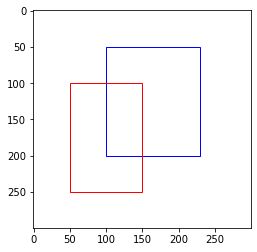

In [197]:
figure, ax = plt.subplots(1)

bbox1 = torch.Tensor([100, 50, 230, 200])
bbox2 = torch.Tensor([50, 100, 150, 250])

background = np.ones((300,300, 3), dtype=np.uint8) * 255
rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2]-bbox1[0], bbox1[3]-bbox1[1], edgecolor='b', facecolor="none")
rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2]-bbox2[0], bbox2[3]-bbox2[1], edgecolor='r', facecolor="none")
ax.add_patch(rect1)
ax.add_patch(rect2)

ax.imshow(background); plt.show()

In [187]:
bbox1 = torch.Tensor([[100, 50, 230, 200]])
bbox2 = torch.Tensor([[50, 100, 150, 250]])

intersection_over_union(bbox1, bbox2)

bbox1 Area : 19500.0 
bbox2 Area : 15000.0 
Intersection Area : 5000.0


0.16949152946472168

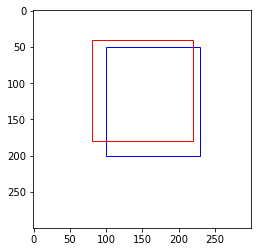

bbox1 Area : 19500.0 
bbox2 Area : 19600.0 
Intersection Area : 15600.0


0.6638298034667969

In [202]:
figure, ax = plt.subplots(1)

bbox1 = torch.Tensor([100, 50, 230, 200])
bbox2 = torch.Tensor([80, 40, 220, 180])

background = np.ones((300,300, 3), dtype=np.uint8) * 255
rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2]-bbox1[0], bbox1[3]-bbox1[1], edgecolor='b', facecolor="none")
rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2]-bbox2[0], bbox2[3]-bbox2[1], edgecolor='r', facecolor="none")
ax.add_patch(rect1)
ax.add_patch(rect2)

ax.imshow(background); plt.show()

bbox1 = torch.Tensor([[100, 50, 230, 200]])
bbox2 = torch.Tensor([[80, 40, 220, 180]])
intersection_over_union(bbox1, bbox2)

# Slice할 때 : 대신 ...로 대체

In [203]:
def intersection_over_union(boxes_preds, boxes_labels, box_format='corners'):
    # boxes_preds의 shape은 (N, 4), N은 예측한 객체의 개수
    # boxes_labels의 shape은 (N, 4)

    if box_format == 'corners': # YOLO dataset
        preds_x1 = boxes_preds[..., 0:1]
        preds_y1 = boxes_preds[..., 1:2]
        preds_x2 = boxes_preds[..., 2:3]
        preds_y2 = boxes_preds[..., 3:4]
        labels_x1 = boxes_labels[..., 0:1]
        labels_y1 = boxes_labels[..., 1:2]
        labels_x2 = boxes_labels[..., 2:3]
        labels_y2 = boxes_labels[..., 3:4]

    elif box_format == 'midpoint': # VOC-PASCAL dataset
        preds_x1 = bboxes_preds[..., 0:1] - bboxes_preds[..., 2:3] / 2
        preds_y1 = bboxes_preds[..., 1:2] - bboxes_preds[..., 3:4] / 2
        preds_x2 = bboxes_preds[..., 0:1] + bboxes_preds[..., 2:3] / 2
        preds_y2 = bboxes_preds[..., 1:2] + bboxes_preds[..., 3:4] / 2
        labels_x1 = bboxes_labels[..., 0:1] - bboxes_labels[..., 2:3] / 2
        labels_y1 = bboxes_labels[..., 1:2] - bboxes_labels[..., 3:4] / 2
        labels_x2 = bboxes_labels[..., 0:1] + bboxes_labels[..., 2:3] / 2
        labels_y2 = bboxes_labels[..., 1:2] + bboxes_labels[..., 3:4] / 2
        
    else: # COCO dataset
        preds_x1 = boxes_preds[..., 0:1]
        preds_y1 = boxes_preds[..., 1:2]
        preds_x2 = boxes_preds[..., 0:1] + boxes_preds[..., 2:3]
        preds_y2 = boxes_preds[..., 1:2] + boxes_preds[..., 3:4]
        labels_x1 = boxes_labels[..., 0:1]
        labels_y1 = boxes_labels[..., 1:2]
        labels_x2 = boxes_labels[..., 0:1] + boxes_labels[..., 2:3]
        labels_y2 = boxes_labels[..., 1:2] + boxes_labels[..., 3:4]

    # Intersection Area
    x1 = torch.max(preds_x1, labels_x1)
    y1 = torch.max(preds_y1, labels_y1)
    x2 = torch.min(preds_x2, labels_x2)
    y2 = torch.min(preds_y2, labels_y2)
    
    intersection = (x2 - x1).clamp(min=0) * (y2 - y1).clamp(min=0)

    preds_area = abs((preds_x2 - preds_x1) * (preds_y2 - preds_y1))
    labels_area = abs((labels_x2 - labels_x1) * (labels_y2 - labels_y1))
    
    print(f"bbox1 Area : {preds_area.item()} \nbbox2 Area : {labels_area.item()} \nIntersection Area : {intersection.item()}")
    return (intersection / (preds_area + labels_area - intersection + 1e-6)).item()

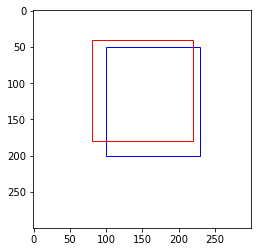

bbox1 Area : 19500.0 
bbox2 Area : 19600.0 
Intersection Area : 15600.0


0.6638298034667969

In [204]:
figure, ax = plt.subplots(1)

bbox1 = torch.Tensor([100, 50, 230, 200])
bbox2 = torch.Tensor([80, 40, 220, 180])

background = np.ones((300,300, 3), dtype=np.uint8) * 255
rect1 = patches.Rectangle((bbox1[0], bbox1[1]), bbox1[2]-bbox1[0], bbox1[3]-bbox1[1], edgecolor='b', facecolor="none")
rect2 = patches.Rectangle((bbox2[0], bbox2[1]), bbox2[2]-bbox2[0], bbox2[3]-bbox2[1], edgecolor='r', facecolor="none")
ax.add_patch(rect1)
ax.add_patch(rect2)

ax.imshow(background); plt.show()

intersection_over_union(bbox1, bbox2)